## 얼굴 인식
- 눈 코 입 등의 위치관계를 확인, 그레이스케일로 변환하여 명암 패턴을 결합하여 얼굴의 형태인지 확인
    - 코라면 코는 밝게, 코 주변은 어둡게 나오는 특징 등

## 얼굴 검출 프로그램 만들기

### 얼굴 검출 캐스케이드 파일 내려받기
- [github](https://github.com/opencv/opencv/tree/master/data/haarcascades)
- [정면 얼굴 검출](https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_alt.xml)

### 검출 과정
1. 캐스케이드 파일을 지정해서 검출기 만들기
2. 대상 이미지를 읽어 들이고 그레이스케일로 변환
3. 얼굴 검출 실행

- `cv2.CascadeClassifier(cascade_file)` : 물체 검출기, 매개변수=캐스케이드 파일
- `CascadeClassifier.detectMultiScale()` : 얼굴 검출 실행
    - `minSize=(150,150)` : 얼굴 인식 영역의 최소 크기

얼굴의 좌표 : 319 308 405 405


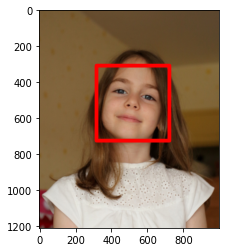

In [1]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정
cascade_file = '../datasets/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지 읽어서 그레이 스케일로 변환
img = cv2.imread('../datasets/girl.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
# 결과 확인
if len(face_list)==0:
    print('실패')
    quit()

# 인식한 부분 표시
for x, y, w, h in face_list:
    print('얼굴의 좌표 :', x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, x+h), red, thickness=20)

# 이미지 출력
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## OpenCV로 모자이크 처리하기
`mosaic.py`
```python
import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출
    x1, y1, x2, y2 = rect
    w = x2-x1
    h = y2-y1

    i_rect = img[y1:y2, x1:x2]

    # 축소하고 확대
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)

    # 모자이크 적용
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2
```

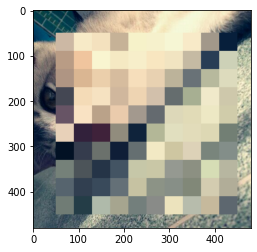

In [2]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic

# 이미지 읽고 모자이크 처리
img = cv2.imread('../datasets/cat.jpg')
mos = mosaic(img, (50, 50, 450, 450), 10)

# 이미지 출력
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

## 사람 얼굴에 자동으로 모자이크 처리

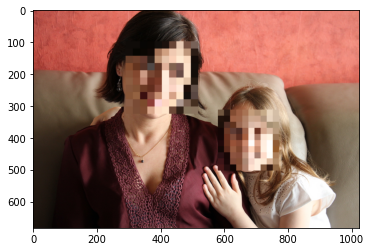

In [3]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic

# 캐스케이드 파일 지정
cascade_file = '../datasets/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지 읽어서 그레이 스케일로 변환
img = cv2.imread('../datasets/family.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
# 결과 확인
if len(face_list)==0:
    print('실패')
    quit()

# 인식한 부분 표시
for x, y, w, h in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 옆모습, 기울어진 얼굴 검출 - 잘 못함
- `scipy.ndimage.rotate(img, ang)` : 이미지 회전
- `matplotlib.pyplot.subplot(nrows, ncols, pos)` : 행수, 열수 지정, 몇 번째에 렌더링할지 위치 지정

---0---
얼굴의 좌표 : 319 308 724 724
---10---
얼굴의 좌표 : 394 385 803 803
---20---
얼굴의 좌표 : 451 444 859 859
---30---
얼굴의 좌표 : 494 483 903 903
---40---
---50---
---60---
---70---
---80---


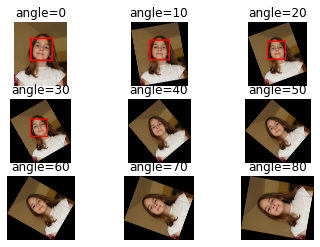

In [4]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

cascade_file = '../datasets/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread('../datasets/girl.jpg')

def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300, 300))

    # 인식한 부분 표시
    for x, y, w, h in face_list:
        print('얼굴의 좌표 :', x, y, x+w, x+h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, x+h), red, thickness=30)

# 이미지 회전시켜가며 테스트
for i in range(0, 9):
    ang = i*10
    print('---'+str(ang)+'---')
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.title('angle='+str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
plt.show()